# Code for Hierarchical Clustering to obtain labels (suitability category)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
#Loading locational dataset
df = pd.read_csv('../final-dataset/data-scaled-agg.csv', index_col='County')
df.head(20)

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest
County,,,,,,,,,,,
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338
51003,0.108095,0.182011,0.281478,0.361577,0.330150,0.398268,0.652957,0.669414,0.672845,0.580575,0.679813
51005,0.187226,0.147870,0.208440,0.382735,0.309672,0.361536,0.590581,0.651482,0.660489,0.531379,0.897165
51007,0.157467,0.144258,0.319836,0.347694,0.488828,0.370654,0.753323,0.808243,0.809483,0.716207,0.651586
51009,0.184217,0.145333,0.205452,0.416978,0.325681,0.367647,0.499006,0.525380,0.539368,0.463678,0.770831
51011,0.140248,0.158561,0.278259,0.427413,0.398133,0.403431,0.427002,0.337238,0.280747,0.347356,0.662506
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268
51015,0.197927,0.147820,0.225123,0.379990,0.321457,0.383072,0.615071,0.686479,0.682759,0.561379,0.582228
51017,0.382682,0.130588,0.262562,0.372108,0.370891,0.394608,0.681005,0.768185,0.779741,0.641724,0.899831


In [4]:
# Using the elbow method to determine the k value to be applied
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
    sse.append(km.inertia_)

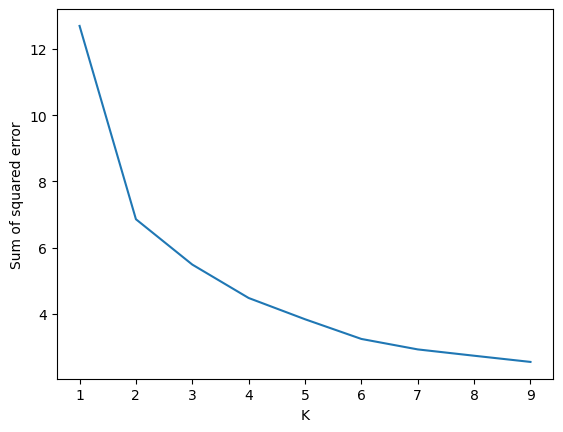

In [5]:
# Plot to obtain elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [6]:
# create clusters using k value = 4
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [7]:
# Determining mean cluster characterisitics
y_hc = hc.fit_predict(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
df['cluster'] = y_hc
df.sort_values("cluster", inplace = True, ascending=True)

#average input vars by cluster
df_cluster = df.groupby('cluster').mean()

/Users/hananur/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: ylabel='cluster'>

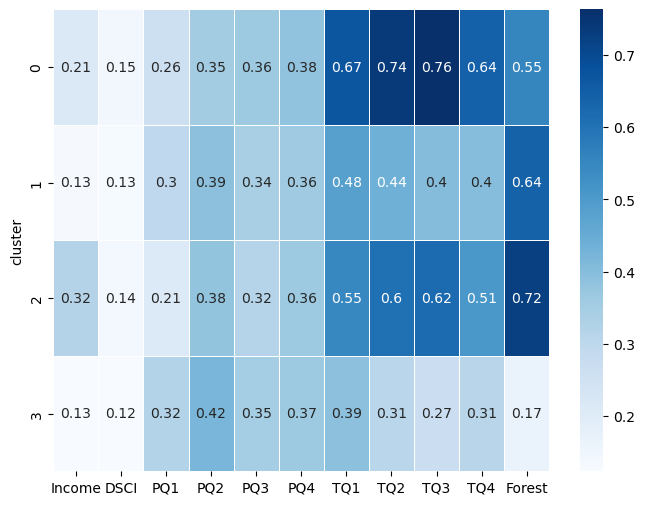

In [8]:
#Heatmap of cluster characteristics
plt.figure(figsize=(8,6))
sns.heatmap(df_cluster, annot=True, cmap="Blues", linewidths=.5)

In [9]:
# see how clusters are distributed
df['cluster'].value_counts()

cluster
0    40
2    23
1    22
3     5
Name: count, dtype: int64

In [10]:
# Look at counties in smallest cluster
df[df['cluster'] == 3]

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest,cluster
County,,,,,,,,,,,,
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268,3
51107,0.176528,0.129553,0.262200,0.422371,0.304163,0.345719,0.243119,0.193782,0.158764,0.189310,0.359856,3
51131,0.099351,0.117189,0.439573,0.415893,0.389930,0.397124,0.467713,0.404628,0.346264,0.386092,0.098323,3
51115,0.131867,0.118457,0.362594,0.415861,0.354178,0.358072,0.411094,0.293565,0.254598,0.315172,0.224077,3
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338,3


In [11]:
#To obtain the entire cluster labels
print(hc.labels_)

[3 2 2 0 2 1 3 0 2 2 1 1 2 2 1 2 0 0 0 0 1 1 2 1 2 0 0 0 0 0 2 2 0 1 0 2 0
 0 0 0 1 0 1 1 0 1 0 0 2 0 3 2 1 1 3 1 0 0 2 0 3 1 1 0 0 2 0 2 2 0 0 2 0 2
 1 0 2 1 1 2 0 0 0 0 0 1 0 0 1 0]


# Categorizing the clusters as suitability levels

In [12]:
# Need to research into what factors lead to land being more suitable for forestation
# Then assign levels based on the averages of each cluster from above

# Maybe redo if we can get more data and redo clusters


# KNN for suitability prediction

In [88]:
# loading everything that might be helpful
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
import torch
from torch.utils.data import DataLoader, random_split
from torch import Generator
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch import manual_seed as torch_manual_seed
import random
import numpy as np

from torch.cuda import max_memory_allocated, set_device, manual_seed_all
from torch.backends import cudnn
from sklearn.metrics import accuracy_score, classification_report

def setup_seed(seed):
    torch_manual_seed(seed)
    manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    cudnn.deterministic = True

SEED = 42
setup_seed(SEED)

In [23]:
df

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest,cluster
County,,,,,,,,,,,,
51095,0.133077,0.177256,0.293530,0.385767,0.355096,0.424967,0.656306,0.687925,0.666092,0.575862,0.443005,0
51073,0.103257,0.174113,0.261872,0.316100,0.317447,0.384216,0.679749,0.725813,0.732471,0.619540,0.465336,0
51077,0.343727,0.108168,0.296355,0.364066,0.443771,0.378203,0.750916,0.835864,0.872845,0.761034,0.665734,0
51079,0.085511,0.189160,0.292479,0.313356,0.348699,0.378562,0.712611,0.769487,0.782040,0.659195,0.668776,0
51081,0.182271,0.170831,0.257011,0.335918,0.321886,0.387484,0.670958,0.733478,0.734626,0.610575,0.516608,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268,3
51107,0.176528,0.129553,0.262200,0.422371,0.304163,0.345719,0.243119,0.193782,0.158764,0.189310,0.359856,3
51131,0.099351,0.117189,0.439573,0.415893,0.389930,0.397124,0.467713,0.404628,0.346264,0.386092,0.098323,3


In [24]:
TEST_RATIO = 0.2
BATCH_SIZE = 32

size_all = len(df)
print(f'Before splitting the full dataset into train, validation, and test: len(dataset_all)={size_all}')

# training/val/test dataset
size_train = size_all - 6
size_val = int(size_train * TEST_RATIO)
size_train_sub = size_train - size_val

# split data into train and test
# Test = 6 counties of interst: Accomack, Fauquier, Greensville, Hanover, Rockingham, Wise
dataset_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]

# Train = all except 6 counties of interest
dataset_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])

# split training data into train and validation
dataset_train, dataset_val = random_split(dataset_train, [size_train_sub, size_val], generator=Generator().manual_seed(SEED))
print(f'After splitting the full dataset into train, validation, and test: len(dataset_train)={len(dataset_train)}, len(dataset_val)={len(dataset_val)}, len(dataset_test)=6')

# NOTE that you must not use the test dataset for model selection

Before splitting the full dataset into train, validation, and test: len(dataset_all)=90
After splitting the full dataset into train, validation, and test: len(dataset_train)=68, len(dataset_val)=16, len(dataset_test)=6


In [25]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [26]:
X_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])
X_train_full = X_train[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]

y_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])
y_train_full = y_train['cluster']

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2, random_state=49)

In [27]:
#training data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

In [28]:
#testing data
X_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]
X_test = X_test[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]
y_test = y_test['cluster']
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [29]:
#val data
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [30]:
#train data
training_data = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(training_data, batch_size=64)

#test data
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_data, batch_size=64)

#validate data
val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_data, batch_size=64)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
n_acc = [0]*11
for n in [1,2,3,4,5,6,7,8,9,10]:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    preds = neigh.predict(X_val)
    correct = 0
    for i in range(len(preds)):
        if preds[i]==y_val.values[i]:
            correct += 1
    acc = correct/len(preds)
    n_acc[n] = acc
    print(f'{n} neighbors - validation accuracy: {round(acc, 5)} {correct}/{len(preds)}')

1 neighbors - validation accuracy: 0.82353 14/17
2 neighbors - validation accuracy: 0.88235 15/17
3 neighbors - validation accuracy: 0.88235 15/17
4 neighbors - validation accuracy: 0.82353 14/17
5 neighbors - validation accuracy: 0.88235 15/17
6 neighbors - validation accuracy: 0.76471 13/17
7 neighbors - validation accuracy: 0.70588 12/17
8 neighbors - validation accuracy: 0.70588 12/17
9 neighbors - validation accuracy: 0.70588 12/17
10 neighbors - validation accuracy: 0.70588 12/17


Text(0.5, 1.0, 'Validation Accuracy By Number of Neighbors')

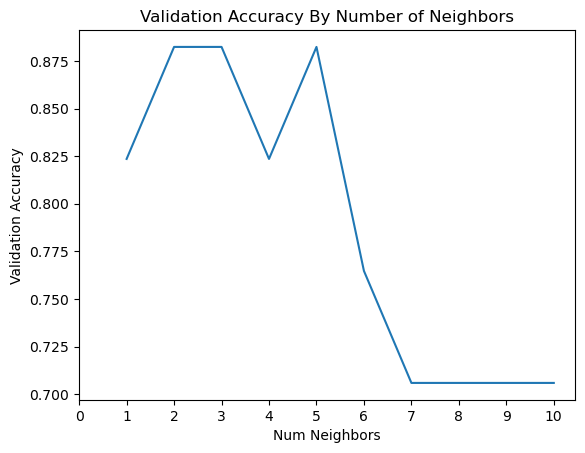

In [82]:
fig, ax = plt.subplots() 
ax.plot([i for i in range(1,len(n_acc))], n_acc[1:])
plt.xlabel('Num Neighbors')
plt.ylabel('Validation Accuracy')
ax.set_xticks(np.arange(len(n_acc)))
plt.title('Validation Accuracy By Number of Neighbors')

In [76]:
nn = [i for i in range(len(n_acc)) if n_acc[i]==max(n_acc)]
for n in nn:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    preds = neigh.predict(X_test)
    correct = 0
    for i in range(len(preds)):
        if preds[i]==y_test.values[i]:
            correct += 1
        acc = correct/len(preds)
    print(f'{n} neighbors - test accuracy: {round(acc, 5)} {correct}/{len(preds)}')

2 neighbors - test accuracy: 1.0 6/6
3 neighbors - test accuracy: 1.0 6/6
5 neighbors - test accuracy: 1.0 6/6


In [91]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_pred))

y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.88
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.50      0.67         4
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         1

    accuracy                           0.88        17
   macro avg       0.90      0.88      0.85        17
weighted avg       0.93      0.88      0.88        17

Test Accuracy: 1.00
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



# Naive Bayes for suitability prediction

In [93]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_val)

accuracy = accuracy_score(y_val.values, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.53
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69         9
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1

    accuracy                           0.53        17
   macro avg       0.13      0.25      0.17        17
weighted avg       0.28      0.53      0.37        17



/Users/hananur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hananur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hananur/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
.53*17

9.01